<a href="https://colab.research.google.com/github/sm160388/capstone-2/blob/main/Shivangi_Mishra_Capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**YES BANK STOCK CLOSING PRICE PREDICTION**

**Problem Statement** - Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

**First, we import required libraries:**

In [ ]:
#importing libraries for data handelling
import numpy as np
import pandas as pd
from numpy import math

#importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')


# **Reading the data**

In [ ]:
#Loading the csv data to pandas dataframe
df= pd.read_csv("/content/drive/MyDrive/Copy of data_YesBank_StockPrices.csv")

In [ ]:
#print the dataset
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


The dataset has Opening, Highest, Lowest and Closing Prices of the stock in every month.

# **Data PreProcessing**

In [ ]:
#first 5 rows
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#last 5 rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


Here, we see that the data is available from July 2005 to Nov 2020

In [ ]:
#no. of rows and columns
df.shape

(185, 5)

In [ ]:
#Details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
#summary of dataset
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


**Missing values**

In [ ]:
#looking for missing values
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

---No missing values in dataset

**Duplicate Rows**

In [ ]:
#looking for duplicates in dataset
len(df[df.duplicated()])

0

--No duplicate data found.

**Outliers**

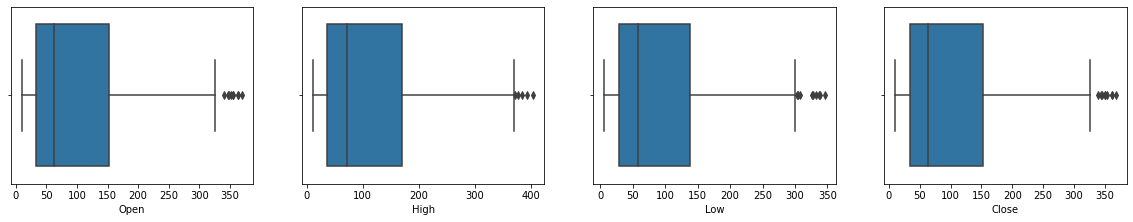

In [118]:
#defining a variable containing all the numerical columns
plt.figure(figsize=(20,15))
columns= ['Open', 'High', 'Low', 'Close']
n=1
for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])

**Findings:-**

Outliers are present in each column.By, converting our features to normal distribution using log transform .We can remove outliers from the dataset.

**Data type change:-**

In [ ]:
#importing datetime
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [ ]:
#lets look at dataset after date format change
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


Format and data type of date feature changed into datetime.

**Data preprocessing finished**. Dataset is clean and ready for exploratory data analysis.

# **Exploratory Data Analysis**

#**Univariate Analysis**

**Dependent Variable**

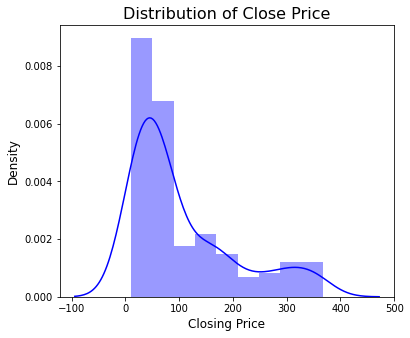

In [ ]:
#distribution plot of Close price to look for normal distribution
plt.figure(figsize=(6,5))
sns.distplot(df['Close'],color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()


--Distribution plot of closing price is skewed towards right.

--In this case we would need to convert it into normal distribution to get a better accuracy from our model..

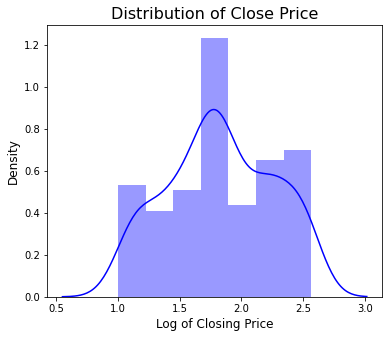

In [ ]:
#for normal distribution
plt.figure(figsize=(6,5))
sns.distplot(np.log10(df['Close']),color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Log of Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

--After log transformation, distribution of closing price is more normal.

**Independent Variable**

In [ ]:
#make a list of independent numerical variables
independent_variables = list(set(df.describe().columns) - {'Close'})
independent_variables

['High', 'Low', 'Open']

<function matplotlib.pyplot.show>

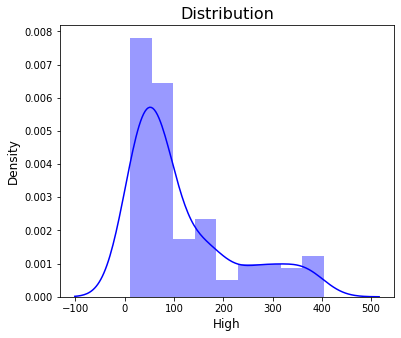

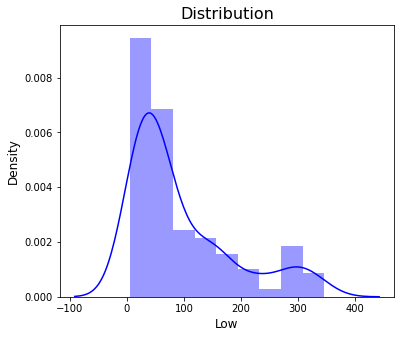

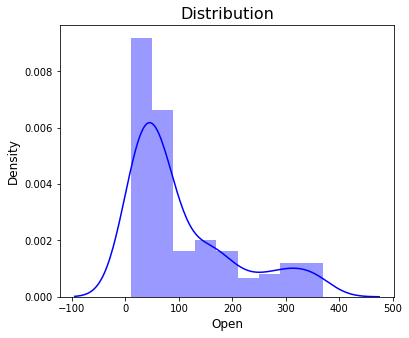

In [ ]:
#Plotting Distribution for Independent variables.
for col in independent_variables:
    plt.figure(figsize=(6,5))
    sns.distplot(df[col], color='blue')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

**Findings:-**

--All the features are skewed towards right.

--Apply log transformation to make them normally distributed

<function matplotlib.pyplot.show>

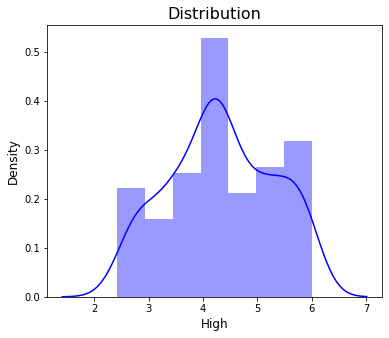

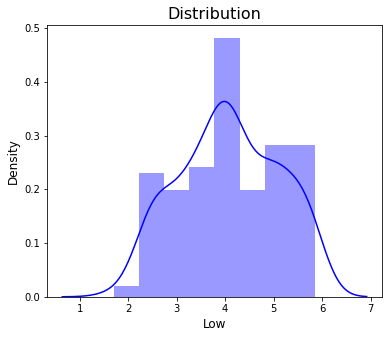

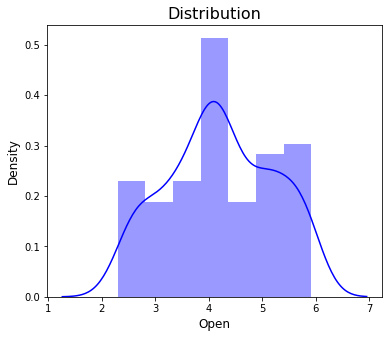

In [ ]:
#apply log transformation for normal distribution
for col in independent_variables:
    plt.figure(figsize=(6,5))
    feature_to_log = np.log(df[col])
    sns.distplot(feature_to_log, color='blue')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

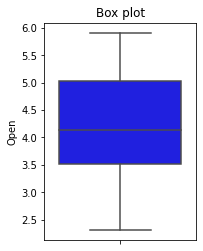

In [121]:
plt.subplot(1, 2, 2)
plt.title("Box plot")
sns.boxplot(y=feature_to_log, color="blue")
 
plt.show()

**Findings:-**

1. After the log transformation the distribution of our Data Set turned into symmetrical.
2. From the box plot, We see that outliers are removed by log transformation.
3. From the above boxplot we can see that after applying np.log10() method with independent features "Open" , "High" , "Low" we get a normal distribution curve which helps to remove the outliers from the column "Open" , "High" , "Low".
4. From the boxplot, We can also find the quartile (q1 , q2 , q3)

#**Bivariate Analysis**

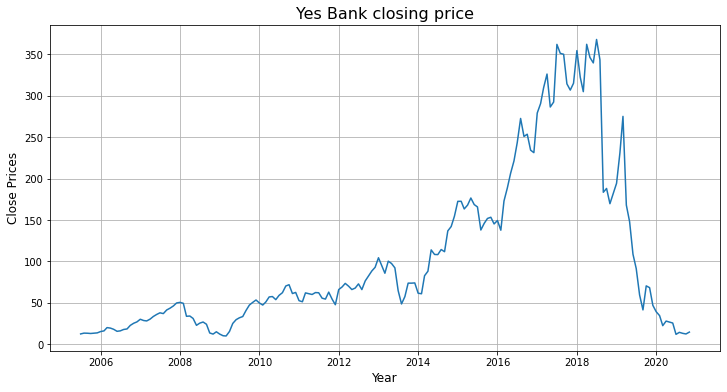

In [ ]:
#plotting close price vs date
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Close Prices', fontsize=12)
plt.plot(df['Date'], df['Close'])
plt.title('Yes Bank closing price', fontsize=16)
plt.show()

This plot of Closing prices of different dates give a very vivid picture of fluctuation in prices regarding different time-duration. After 2018 there is sudden fall in the stock closing price. It makes sense how severely the Rana Kapoor fraud case affected the price of Yes bank stocks.

**Lets visualize close, open, low and high in combined line plot.**

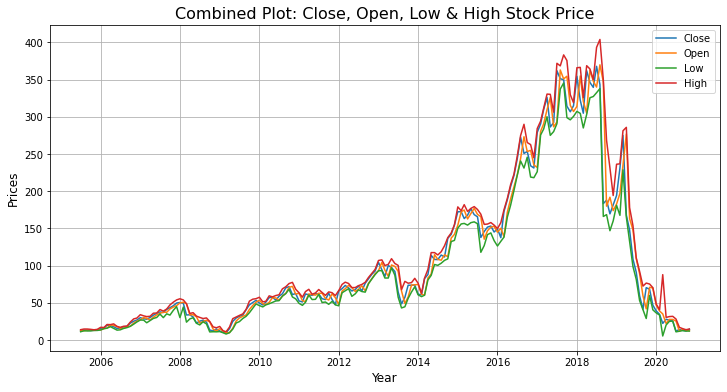

In [ ]:
# Combined Line Plot for all features with respect to date.
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.plot(df['Date'], df['Open'])
plt.plot(df['Date'], df['Low'])
plt.plot(df['Date'], df['High'])
plt.legend(['Close','Open','Low','High'])
plt.title('Combined Plot: Close, Open, Low & High Stock Price', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Prices', fontsize=12)
plt.grid()

**Findings:-**

--All the prices shows almost similar trends with each other.

-- Which means that this features may be strongly correlated with each other

**Finding correlation between variables**

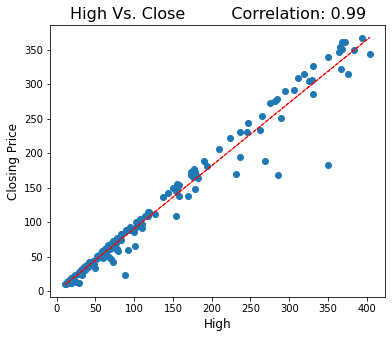

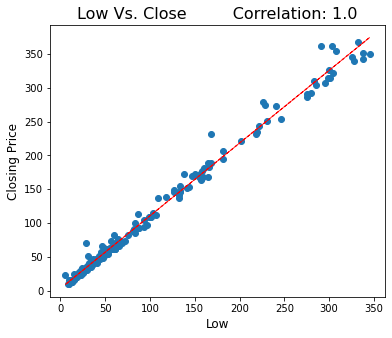

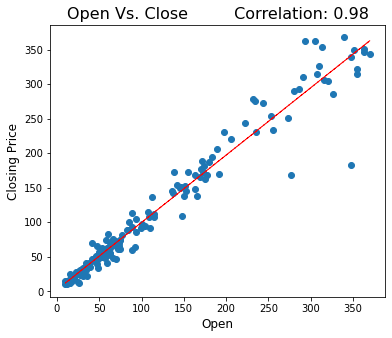

In [ ]:
#Now, lets check the relationship of each features with our dependent variable
for col in independent_variables:
   fig = plt.figure(figsize=(6, 5))
   ax = fig.gca()
   feature = df[col]
   label = df['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col, fontsize=12)
   plt.ylabel('Closing Price', fontsize=12)
   ax.set_title(col + ' Vs. Close' + '         Correlation: ' + str(round(correlation,2)), fontsize=16)
   z = np.polyfit(df[col], df['Close'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)

**Findings:-**

**Bivariate analysis showed high correlation of close price with other features.**

All independent features have linear relationship with the dependent variable.

We can't remove any variables from our date because each of the variables are important for our model.

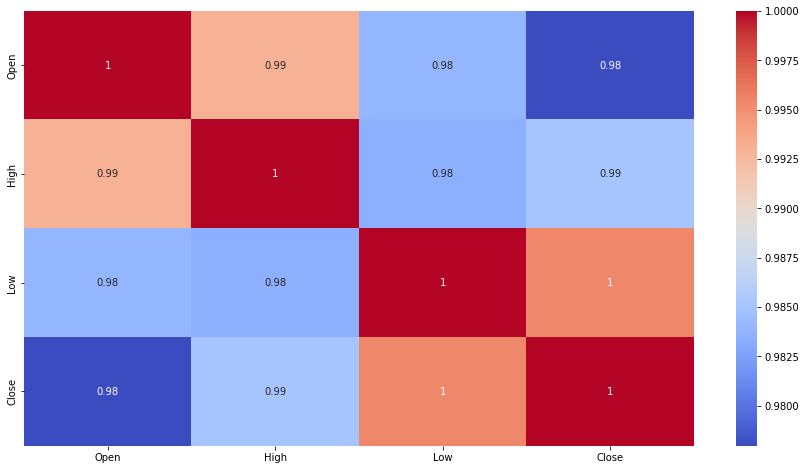

In [ ]:
# plotting correlation plot
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.show()

Here, all variables shows the highest correlation among them .

# **Transforming and splitting data**

In [ ]:
#Since the Date column cannot be used in our Model so we will convert it as index and drop the column
df.index= df['Date']
df.drop('Date', axis= 1, inplace= True)

In [ ]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


X = Independant Variable values

y = Dependent Variable values

In [ ]:
# Splitting our data into Dependent and Independent Variables
X = df[['Open', 'High', 'Low']]
y = df['Close']

Data must be normal distributed. So applying narmalization on X & y.

#**Modelling**

**Normalisation**

In [ ]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

**Train (80%) and Test (20%) Split**

In [ ]:
#Splitting data into Testing and Training datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [ ]:
#Checking shape of training dataset
X_train.shape

(148, 3)

In [ ]:
#Checking shape of testing dataset
X_test.shape

(37, 3)

In [ ]:
#data transformation
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**We will build four models**

**Linear Regression** :-Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis.Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression.

**Lasso** :-Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

**Ridge** :-Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

**Elastic Net** :-Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions. ... Elastic Net is an extension of linear regression that adds regularization penalties to the loss function during training.

**Cross-validation** :-It is a resampling procedure used to evaluate machine learning models on a limited data sample. Basically Cross Validation is a technique using which Model is evaluated on the dataset on which it is not trained i.e. it can be a test data or can be another set as per availability or feasibility.

#**Regression Models**

#1. Linear Regression

In [ ]:
#fitting data into Linear Regression
linear_reg = LinearRegression()
linear_reg_model = linear_reg.fit(X_train,y_train)

In [ ]:
#train accuracy of linear regression model
round(linear_reg.score(X_train,y_train), 3)

0.815

In [ ]:
#test accuracy of linear regression model
round(linear_reg.score(X_test,y_test), 3)

0.823

In [ ]:
#prediction of test data.
y_pred = linear_reg.predict(X_test)

**Evaluation metrices of Linear Regression**

In [ ]:
# Test Performance of linear regression model
print("MSE :",round(mean_squared_error(y_test, y_pred), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),3))
print("R2 :",round(r2_score(y_test, y_pred), 3))

MSE : 0.032
RMSE : 0.178
MAE : 0.151
MAPE : 0.095
R2 : 0.823


**Actual Vs Predicted**

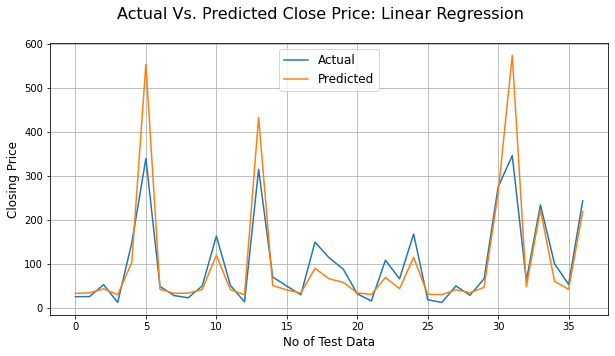

In [ ]:
# Actual Price vs. Predicted Price for Linear Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()



#**2. Lasso Regression**

In [ ]:
#fitting data into Lasso Regression
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.005,max_iter=3000)
lasso_reg_model = lasso_reg.fit(X_train,y_train)

In [ ]:
#accuracy of lasso regression model
round(lasso_reg.score(X_train,y_train),3)

0.813

In [ ]:
#prediction of test data.
y_pred_lasso = lasso_reg.predict(X_test)

**Evaluation Metrics of Lasso Regression:-**

In [ ]:
# Test Performance of lasso regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),3))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 3))

MSE : 0.033
RMSE : 0.181
MAE : 0.153
MAPE : 0.098
R2 : 0.817


**Lasso Regression: Actual Vs. Predicted**

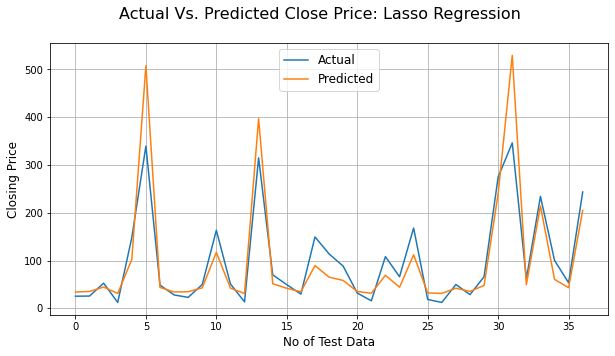

In [ ]:
# Actual Price vs. Predicted Price for Lasso Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()


 **Cross Validation on Lasso Regression**

In [ ]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyper-Parameter Tuning for Lasso Regression

lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model_cv = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

In [ ]:
lasso_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,round(lasso_model_cv.best_params_['alpha'], 3))
print("The negative mean squared error for is: ", round(lasso_model_cv.best_score_,3))

The best fit alpha value is found out to be : 0.001
The negative mean squared error for is:  -0.035


In [ ]:
#prediction of test data.
y_pred_lasso_cv = lasso_model_cv.predict(X_test)

**Evaluation Metrics of Lasso Regression after Validation:**

In [ ]:
# Test Performance of lasso regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_lasso_cv), 3))

MSE : 0.032
RMSE : 0.179
MAE : 0.152
MAPE : 0.096
R2 : 0.82


**Lasso Regression After Validation: Actual Vs. Predicted**

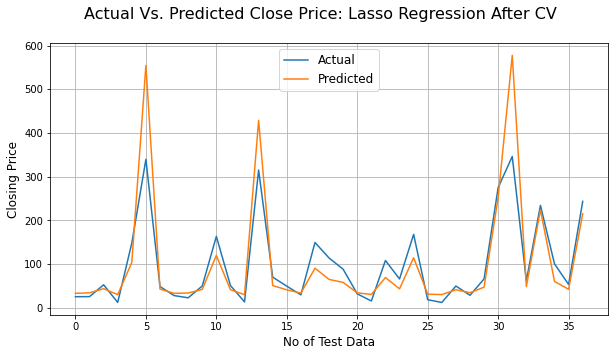

In [ ]:
# Actual Price vs. Predicted Price for Lasso Regression after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()


#**3. Ridge Regression**

In [ ]:
#fitting data into Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(X_train,y_train)

In [ ]:
#accuracy of lasso regression model
round(ridge_reg.score(X_train,y_train),3)

0.815

In [ ]:
#prediction of test data.
y_pred_ridge = ridge_reg.predict(X_test)

In [ ]:
# Test Performance of ridge regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge),3))
print("R2 :",round(r2_score(y_test, y_pred_ridge), 3))

MSE : 0.032
RMSE : 0.178
MAE : 0.151
MAPE : 0.096
R2 : 0.822


**Ridge Regression: Actual Vs. Predicted**

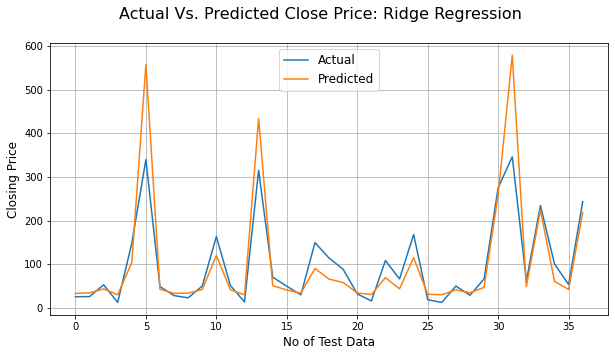

In [ ]:
# Actual Price vs. Predicted Price for Ridge Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

**Cross Validation on Ridge Regression**

In [ ]:
# Hyper-Parameter Tuning for Lasso Regression

ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model_cv = GridSearchCV(ridge_cv, parameters,scoring = 'neg_mean_squared_error',cv = 3)


In [ ]:
ridge_model_cv.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_model_cv.best_params_['alpha'])
print("The negative mean squared error for is: ", round(ridge_model_cv.best_score_,3))

The best fit alpha value is found out to be : 1
The negative mean squared error for is:  -0.035


In [ ]:
#prediction of test data.
y_pred_ridge_cv = ridge_model_cv.predict(X_test)

**Evaluation Metrics of Ridge Regression after Validation:-**



In [ ]:
# Test Performance of ridge regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_ridge_cv), 3))


MSE : 0.033
RMSE : 0.181
MAE : 0.153
MAPE : 0.097
R2 : 0.816


**Ridge Regression After Validation: Actual Vs. Predicted**



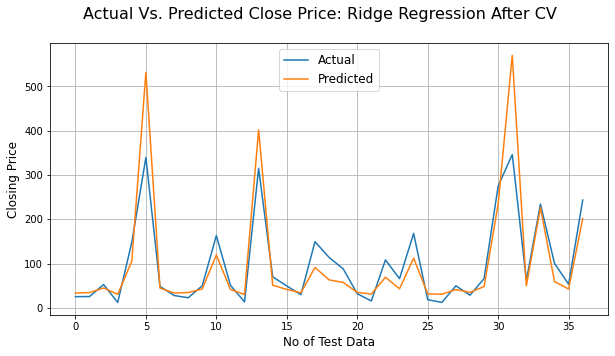

In [ ]:
# Actual Price vs. Predicted Price for Ridge Regression after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()


#**4. Elastic net**

In [ ]:
#fitting data into Elastic Net
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_model = elastic.fit(X_train,y_train)

In [ ]:
#accuracy of lasso regression model
round(elastic.score(X_train,y_train),3)

0.542

In [ ]:
#prediction of test data.
y_pred_elastic = elastic.predict(X_test)

In [ ]:
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),3))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 3))

MSE : 0.083
RMSE : 0.289
MAE : 0.24
MAPE : 0.152
R2 : 0.531


**Elastic Net: Actual Vs. Predicted**



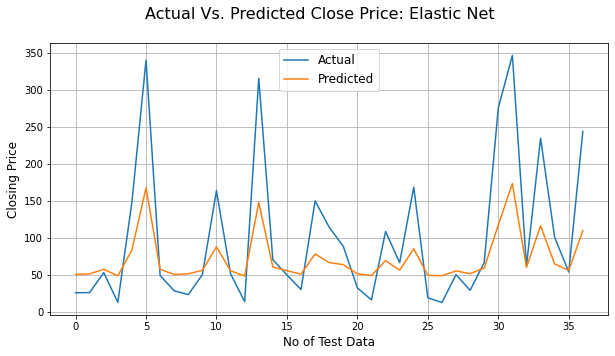

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

**Cross Validation on Elastic Net**


In [ ]:
# Hyper-Parameter Tuning for Elastic Net

elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model_cv = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=3)

In [ ]:
elastic_model_cv.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
elastic_model_cv.best_params_


{'alpha': 0.001, 'l1_ratio': 1}

In [ ]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model_cv.best_params_['alpha'], elastic_model_cv.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model_cv.best_score_,3))


The best fit alpha and L1 ratio value is found out to be : 0.001 1
The negative mean squared error for is:  -0.035


In [ ]:
#prediction of test and train data.
y_pred_elastic_cv = elastic_model_cv.predict(X_test)

**Evaluation Metrics of Elastic Net after Validation:-**



In [ ]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_elastic_cv), 3))

MSE : 0.032
RMSE : 0.179
MAE : 0.152
MAPE : 0.096
R2 : 0.82


**Elastic Net After Validation: Actual Vs. Predicted**



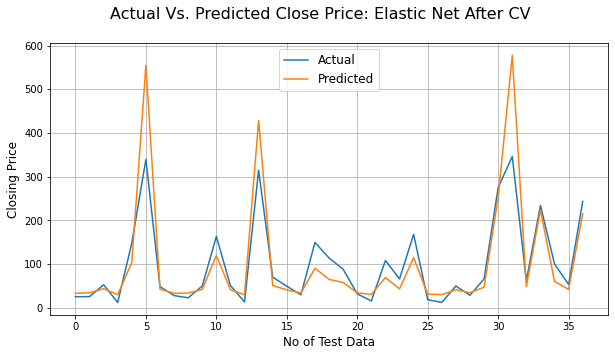

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

#**Evaluation Matrics Comparison:-**


In [ ]:
def compare_model(X_train, X_test, y_train, y_test, models):
  df_columns = []
  #Creating dataframe to store the train and test metrics for each of the models
  df=pd.DataFrame(columns=df_columns)

  i = 0
  #need to pass each model one by one
  for model in models:
    #fiting each model training dataset
    model.fit(X_train, y_train)
    #predicting y values for each model
    y_pred = model.predict(X_test)
    #getting accuracy score for each model
    accuracy = model.score(X_test, y_test)

    #getting all evaluation matrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 3)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),3)
    MAE = round(mean_absolute_error(y_test, y_pred),3)
    MAPE = round(mean_absolute_percentage_error(y_test, y_pred),3)
    R2 = round(r2_score(y_test, y_pred), 3)

    #getting all above into dataframe
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "MAPE"] = MAPE
    df.loc[i, "R2"] = R2

    #to get values in next rows for next model
    i=i+1

  #Sorting values by accuracy
  df.sort_values(by=['R2'],ascending=False,inplace=True, ignore_index=True)
    
  return df


In [ ]:
all_model = [linear_reg, lasso_reg, ridge_reg, elastic]


In [ ]:
#Evaluation Matrics Comparison
matrics_compare_df = compare_model(X_train, X_test, y_train, y_test, all_model)
matrics_compare_df


,Model,MSE,RMSE,MAE,MAPE,R2
0,LinearRegression,0.032,0.178,0.151,0.095,0.823
1,Ridge,0.032,0.178,0.151,0.096,0.822
2,Lasso,0.033,0.181,0.153,0.098,0.817
3,ElasticNet,0.083,0.289,0.240,0.152,0.531


#**Conclusion**

1. We got a maximum accuracy of 82%.

2. Linear, lasso and ridge regression show almost same R squared values.

3. Whereas elastic net model shows lowest R squared value and high MSE, RMSE, MAE & MAPE.

4. Close, Open and high price of stock are strongly correlated with each other.
5. Target Variable is strongly correlated with all independent features.

6. I have implemented Cross Validation on different algorithm as CV performs better on small datasets.But, the result is nearly same except elastic net.
7. In all the models except Elastic Net, the accuracy lie within the range of 81 to 83% 





